In [1]:
import tensorflow as tf
import numpy as np
import pandas
import keras
import math
from PIL import Image
from keras.models import Sequential,load_model
from keras.layers import Dense, Activation,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [3]:
dat=pandas.read_csv("C:\\Users\\Bhavesh\\Documents\\snapchat_filter\\training.csv")

In [4]:
data=pandas.DataFrame(dat).to_numpy()
out=(data[:,:30])/96-0.5 ###extra normalization

In [5]:
def hasnan(inarray):
    for i in range(len(inarray)):
        if(math.isnan(inarray[i])):
            return True
    return False
def usefuldata(inarray,inarray1):
    outarray=[]
    outarray1=[]
    for i in range(len(inarray)):
        if hasnan(inarray[i]) is False:
            outarray.append(inarray[i])
            outarray1.append(inarray1[i])
    return outarray,outarray1

In [6]:
imgs_dat=[]
for i in range(len(dat)):
    a=dat.iloc[i,-1]
    img=np.array(a.split(' ')).astype(int)
    img=np.reshape(img,(96,96))
    img=img/255
    imgs_dat.append(img)

In [7]:
key_train,imgs_train=usefuldata(out,imgs_dat)
print(np.shape(imgs_train))
key_train=np.array(key_train)
imgs_train=np.asarray(np.array(imgs_train)).reshape((len(key_train),96,96,1))

(2140, 96, 96)


In [9]:
####DATA AUGMENTATION
def augment(img_in, kpoints):
    f_img = img[:, ::-1,:]                          # Mirror the image
    for i in range(0,len(kpoints),2):               # Mirror the key point coordinates
        x_renorm = (kpoints[i]+0.5)*96               # Denormalize x-coordinate
        dx = x_renorm - 48                          # Get distance to midpoint
        x_renorm_flipped = x_renorm - 2*dx      
        kpoints[i] = x_renorm_flipped/96 - 0.5       # Normalize x-coordinate
    return f_img, kpoints

aug_imgs_train = []
aug_points_train = []
for i, img in enumerate(imgs_train):
    mir_img, mir_kpoints = augment(img, key_train[i])
    aug_imgs_train.append(mir_img)
    aug_points_train.append(mir_kpoints)
    
aug_imgs_train = np.array(aug_imgs_train)
aug_points_train = np.array(aug_points_train)

# Combine the original data and augmented data
imgs_train = np.concatenate((imgs_train, aug_imgs_train), axis=0)       
key_train = np.concatenate((key_train, aug_points_train), axis=0)

In [14]:
###MODEL DEFINITIONS
def get_model():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, strides=2, padding='same', input_shape=(96,96,1),use_bias=False))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Conv2D(128,kernel_size=3,strides=2,padding='same',use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Conv2D(256,kernel_size=3,strides=2,padding='same',use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Conv2D(128,kernel_size=3,strides=2,padding='same',use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Flatten())
    
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(30))
    return model;

def compile_model(model):       # Compile the model
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['accuracy'])

def train_model(model,inarray,outarray,iterations,batch_size):         # Fit the model
    checkpoint = keras.callbacks.ModelCheckpoint(filepath='C:\\Users\\Bhavesh\\Documents\\snapchat_filter\\weights.4C_F_3D.{epoch:02d}.hdf5',period=50)
    model.fit(inarray, outarray, epochs=iterations, batch_size=batch_size, callbacks=[checkpoint])

In [15]:
model=get_model()
compile_model(model)
train_model(model,imgs_train,key_train,200,32)

Epoch 1/200
4280/4280 [==============================] - 19s 4ms/step - loss: 0.0760 - acc: 0.4283
Epoch 2/200
4280/4280 [==============================] - 16s 4ms/step - loss: 0.0317 - acc: 0.6014
Epoch 3/200
4280/4280 [==============================] - 16s 4ms/step - loss: 0.0262 - acc: 0.6446
Epoch 4/200
4280/4280 [==============================] - 17s 4ms/step - loss: 0.0249 - acc: 0.6537
Epoch 5/200
4280/4280 [==============================] - 18s 4ms/step - loss: 0.0242 - acc: 0.6556
Epoch 6/200
4280/4280 [==============================] - 18s 4ms/step - loss: 0.0236 - acc: 0.6593
Epoch 7/200
4280/4280 [==============================] - 17s 4ms/step - loss: 0.0229 - acc: 0.6605
Epoch 8/200
4280/4280 [==============================] - 17s 4ms/step - loss: 0.0220 - acc: 0.6607
Epoch 9/200
4280/4280 [==============================] - 16s 4ms/step - loss: 0.0212 - acc: 0.6680
Epoch 10/200
4280/4280 [==============================] - 17s 4ms/step - loss: 0.0205 - acc: 0.6713
Epoch 11/

4280/4280 [==============================] - 17s 4ms/step - loss: 0.0133 - acc: 0.7614
Epoch 84/200
4280/4280 [==============================] - 17s 4ms/step - loss: 0.0134 - acc: 0.7621
Epoch 85/200
4280/4280 [==============================] - 17s 4ms/step - loss: 0.0133 - acc: 0.7619
Epoch 86/200
4280/4280 [==============================] - 17s 4ms/step - loss: 0.0133 - acc: 0.7722
Epoch 87/200
4280/4280 [==============================] - 17s 4ms/step - loss: 0.0131 - acc: 0.7584
Epoch 88/200
4280/4280 [==============================] - 18s 4ms/step - loss: 0.0132 - acc: 0.7661
Epoch 89/200
4280/4280 [==============================] - 17s 4ms/step - loss: 0.0132 - acc: 0.7687
Epoch 90/200
4280/4280 [==============================] - 17s 4ms/step - loss: 0.0131 - acc: 0.7668
Epoch 91/200
4280/4280 [==============================] - 17s 4ms/step - loss: 0.0131 - acc: 0.7643
Epoch 92/200
4280/4280 [==============================] - 17s 4ms/step - loss: 0.0131 - acc: 0.7666
Epoch 93/200


In [16]:
dattest=pandas.read_csv("C:\\Users\\Bhavesh\\Documents\\snapchat_filter\\test.csv")

In [7]:
model2 = load_model("C:\\Users\\Bhavesh\\Documents\\snapchat_filter\\weights.final_norm1.hdf5")








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [21]:
from keras.utils import plot_model
plot_model(model2, to_file="C:\\Users\\Bhavesh\\Documents\\snapchat_filter\\model.png")

In [17]:
imgs_test=[]
for i in range(len(dattest)):
    a=dattest.iloc[i,-1]
    img=np.array(a.split(' ')).astype(int)
    img=np.reshape(img,(96,96))
    img=img/255
    imgs_test.append(img)
imgs_test=np.array(imgs_test)
imgs_test=np.asarray(np.array(imgs_test)).reshape((len(imgs_test),96,96,1))

In [16]:
print(np.shape(imgs_test))

(1783, 96, 96, 1)


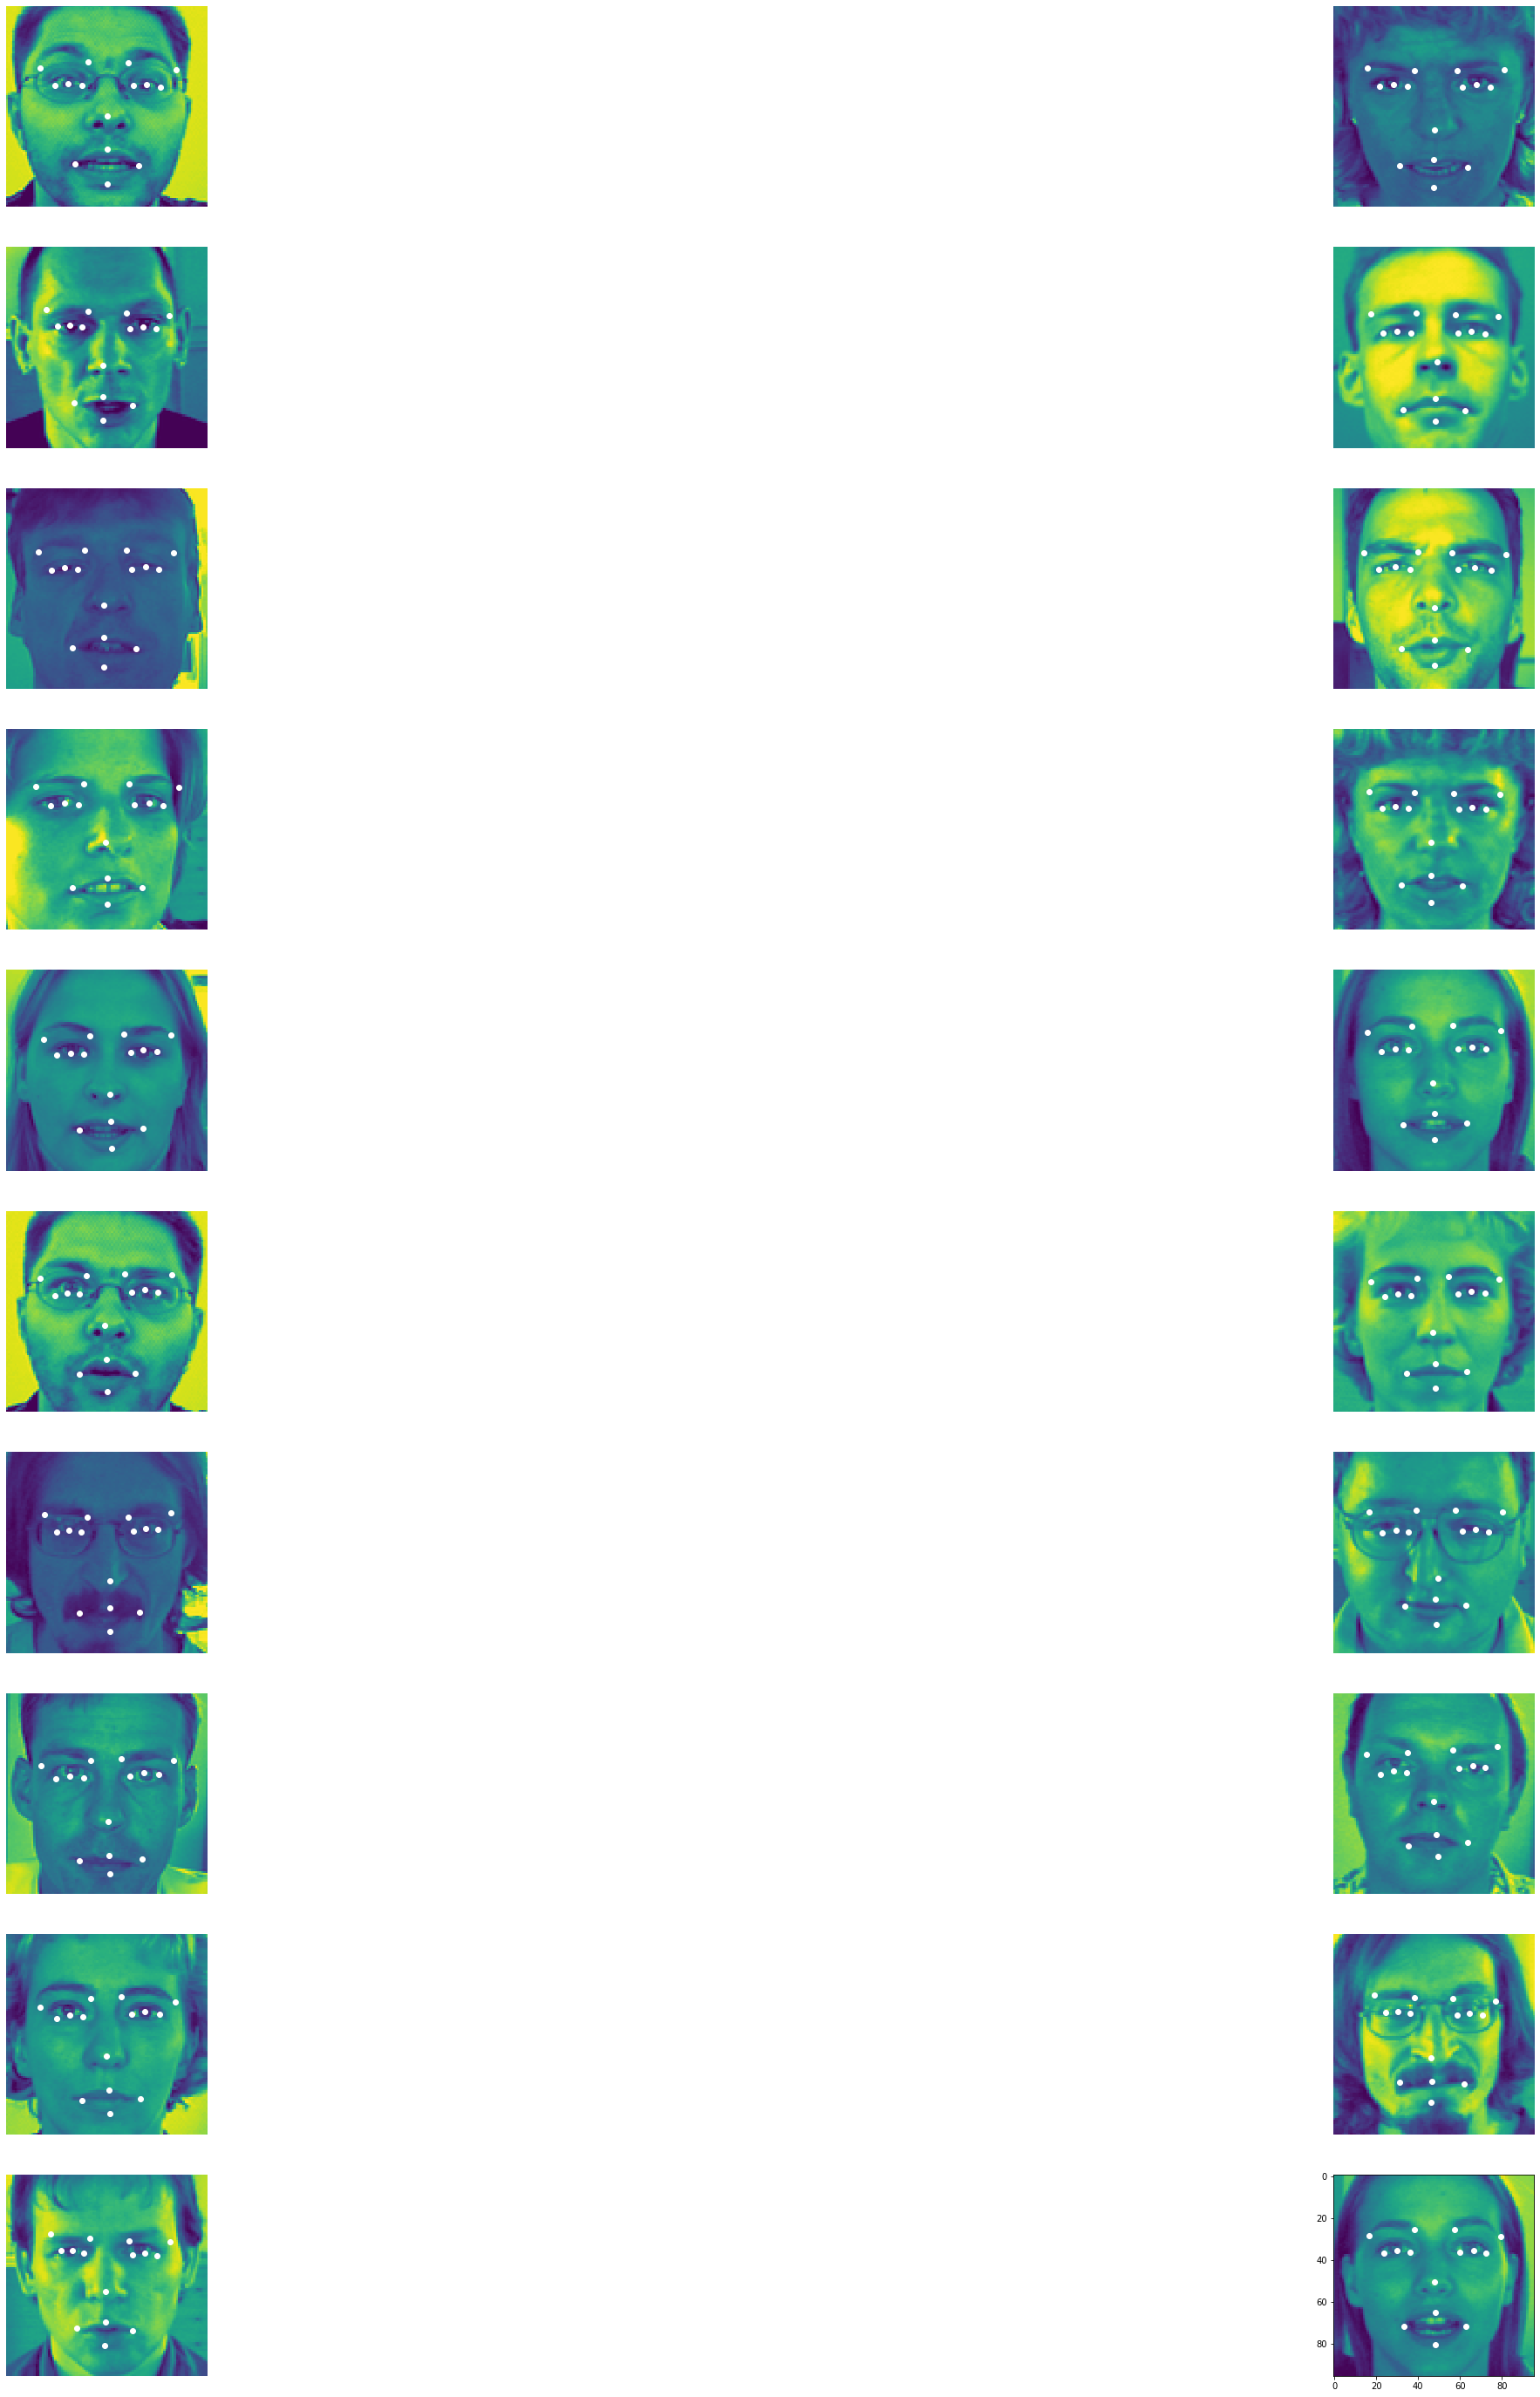

In [18]:
plt.figure(figsize=(50,50))
for i in range(len(imgs_test)):
    test_img_input = np.reshape(imgs_test[i], (1,96,96,1))      # Model takes input of shape = [batch_size, height, width, no. of channels]
    prediction = model.predict(test_img_input)      # shape = [batch_size, values]
    prediction=(prediction+0.5)*96##############denormalize
    img=Image.fromarray(np.uint8(imgs_test[i,:,:,0]*255),mode="L")
    plt.axis('off')
    plt.subplot(10,2,i+1)
    plt.imshow(img)
    c=np.reshape(prediction,(15,2))
    plt.scatter(c[:,0],c[:,1],marker='o',color="white")
    if i == 19:
        break

In [41]:
#print(model.summary())
#print(model2.inputs)
#print(model2.outputs)

(96, 96)
(1, 96, 96, 1)


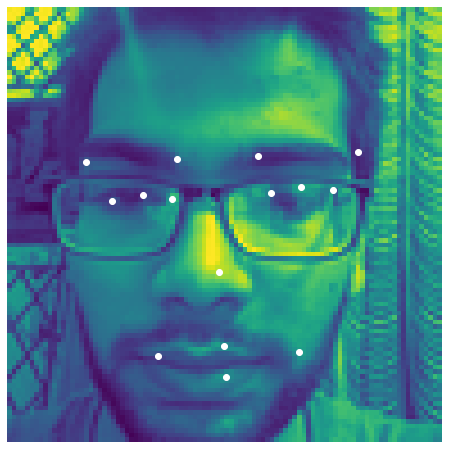

In [27]:
img=Image.open("C:\\Users\\Bhavesh\\Pictures\\face_recog\\anchor.jpg").convert('L')
img=img.resize((96,96),Image.ANTIALIAS)
test_img=np.array(img)/255
print(np.shape(test_img))
plt.figure(figsize=(8,8))
img_input = np.reshape(test_img, (1,96,96,1))    # Model takes input of shape = [batch_size, height, width, no. of channels]
print(np.shape(img_input))
key_prediction = model.predict(img_input)      # shape = [batch_size, values]
key_prediction = (key_prediction+0.5)*96
plt.axis('off')
plt.imshow(img)#,cmap = "gray")
c=np.reshape(key_prediction,(15,2))
plt.scatter(c[:,0],c[:,1],marker='o',color="white")

In [8]:
model2 = load_model("C:\\Users\\Bhavesh\\Documents\\snapchat_filter\\weights.4C_F_3D.INITIAL.hdf5")
adam=keras.optimizers.Adam(lr=0.001,beta_1=0.99,beta_2=0.9999)
opt=keras.optimizers.SGD(lr=0.01)
model2.compile(optimizer=opt,loss="mean_absolute_error",metrics=['accuracy'])
train_model(model2,imgs_train,key_train,200,32)








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



TypeError: train_model() takes 1 positional argument but 5 were given

In [28]:
print(kpoints)

NameError: name 'kpoints' is not defined